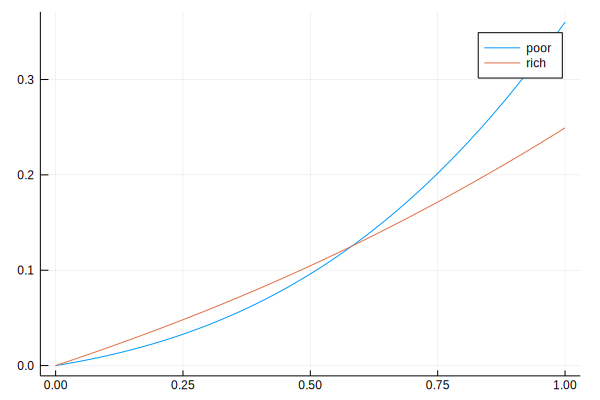

In [2]:
# use package to make plots
using Plots

# use package to solve equations
using Roots

# use package to integrate functions
using QuadGK

# parameters
# wealth rich
const Wr = 0.9
# wealth poor
const Wp = 0.4

# utility function
u(c,h) = c-.5*c^2+h-.5*h^2

# density of health state for rich/low risk type: triangle on [0,1]
fr(s) = 2*s

# density of health state for poor/high risk type: uniform on [0,0.5]
function fp(s)
    if s<0.5
        return 2.0
    else
        return 0.0
    end
end


#optimal treatment
tau(s,q,p,W) = max(0.0,(1-s-(1-q)*(1+p-W))/((1-q)^2+1))

#utility in state s when choosing treatment optimally
uInS(s,q,p,W) = u(W-p-(1-q)*tau(s,q,p,W),s+tau(s,q,p,W))

# expected utility for poor type when choosing tau optimally (expectation over s)
Up(q,p) = quadgk(s->uInS(s,q,p,Wp)*fp(s),0,1)[1] #quadgk takes expectation by integrating uInS*fp over s from 0 to 1

# expected utility for rich type when choosing tau optimally (expectation over s)
Ur(q,p) = quadgk(s->uInS(s,q,p,Wr)*fr(s),0,1)[1]

# indifference curve for rich type, yields premium that give utility level ub for coverage q
function indiffR(q,ub)
    return fzero(p->Ur(q,p)-ub,0,Wr) #fzero solves the equation UR-ub=0 and considers only values betwen 0 and W
end

# indifference curve for poor type, yields premium that give utility level ub for coverage q
function indiffP(q,ub)
    return fzero(p->Up(q,p)-ub,0,Wp)
end

# plot indifference curves
plot(0.0:0.01:1.0,[q->indiffP(q,Up(0,0)),q->indiffR(q,Ur(0,0))],labels=["poor","rich"])

The figure illustrates that indifference curves can intersect twice, i.e. the indifference curve for the high risk poor type is flatter for low coverage levels. The reason is that he utilizes the insurance less. To illustrate this point, we plot expected treatment intensities as a function of coverage levels for the two types below. The poor type uses less treatments for low coverage levels (although his risk of low health states is much higher) while the opposite is true for high coverage levels.

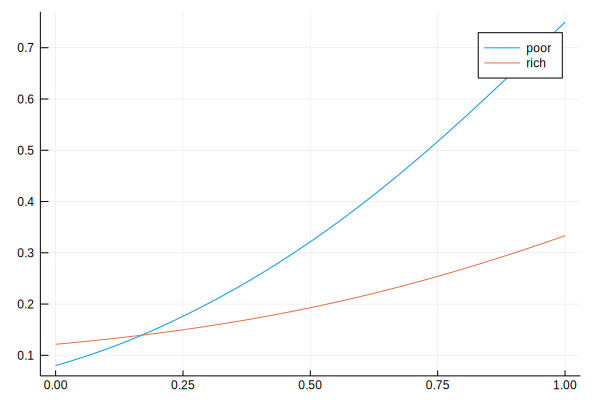

In [3]:
# expected treatment rich type
function tauR(q)
    p = indiffR(q,Ur(0,0))
    return quadgk(s->tau(s,q,p,Wr)*fr(s),0,1)[1]
end

# expected treatment poor type
function tauP(q)
    p = indiffP(q,Up(0,0))
    return quadgk(s->tau(s,q,p,Wp)*fp(s),0,1)[1]
end

plot(0.0:0.01:1.0,[tauP,tauR],labels=["poor","rich"])